# Machine Learning Project

HEART FAILURE PREDICTION ( with CARDIOVASCULAR DISEASE) 
By Chibuzor John Amadi [MAT.502623]

# Description / Objective of Dataset 

                                                         Description
Cardiovascular diseases (CVDs) are one of the highest causes of death globally, taking an estimate of over 15 million lives each year, by statistics that is over  25 percent (25%) of all deaths worldwide. Above (90%) ninety percent of CVD deaths occur due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. 
      Heart failure is a common event caused by CVDs and my dataset contains eleven (11) features that can be possibly studied, analyzed and used to predict a possible heart disease.
        People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more health factors such as hypertension, diabetes, high blood pressure or previous heart related disease)  need early detection and management, we will attempt to use the help of machine learning model to assist in early detection and management.

                                                              OBJECTIVE
 The Objective is analyze, with a given dataset, Heart Failure Prediction and classify between patients with and without cardiovascular disease by creating Classification Models that can predict whether or not a person has presence of heart failure based on physical features of that person.

                                                          Features of the Dataset
1. Age: Age of the patient [years]
2. Sex: Sex of the patient [M: Male, F: Female]
3. ChestPainType: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY:    Asymptomatic]
4. RestingBP: Resting Blood Pressure [mm Hg]
5. Cholesterol: Serum Cholesterol [mm/dl]
6. FastingBS: Fasting Blood Sugar [1: if FastingBS > 120 mg/dl (diabetic), 0: otherwise]
7. RestingECG: Resting Electrocardiogram Results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: Maximum Heart Rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: Oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the Slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: Heart disease, 0: Normal]

## Importing Libraries

Here will be a collection of all necessary libraries for completing the task for this project, Starting from libraries such  

In [1]:

import pandas as pd
import numpy as np
import missingno as msno

from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline
import itertools

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import loguniform, beta, uniform
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# EDA

EDA stands for Exploratory Data Analysis, it is an approach of analyzing data sets to summarize their main characteristics often using statistical graphs and other data visualization methods.
 We will see now the correlation between the different features of our dataset and the target feature.

Uploading the Dataset 

In [2]:
my_data = pd.read_csv('heart.csv')

In [3]:
my_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#my_data.describe(include='all')

Checking for any missing values in our dataset:

<AxesSubplot: >

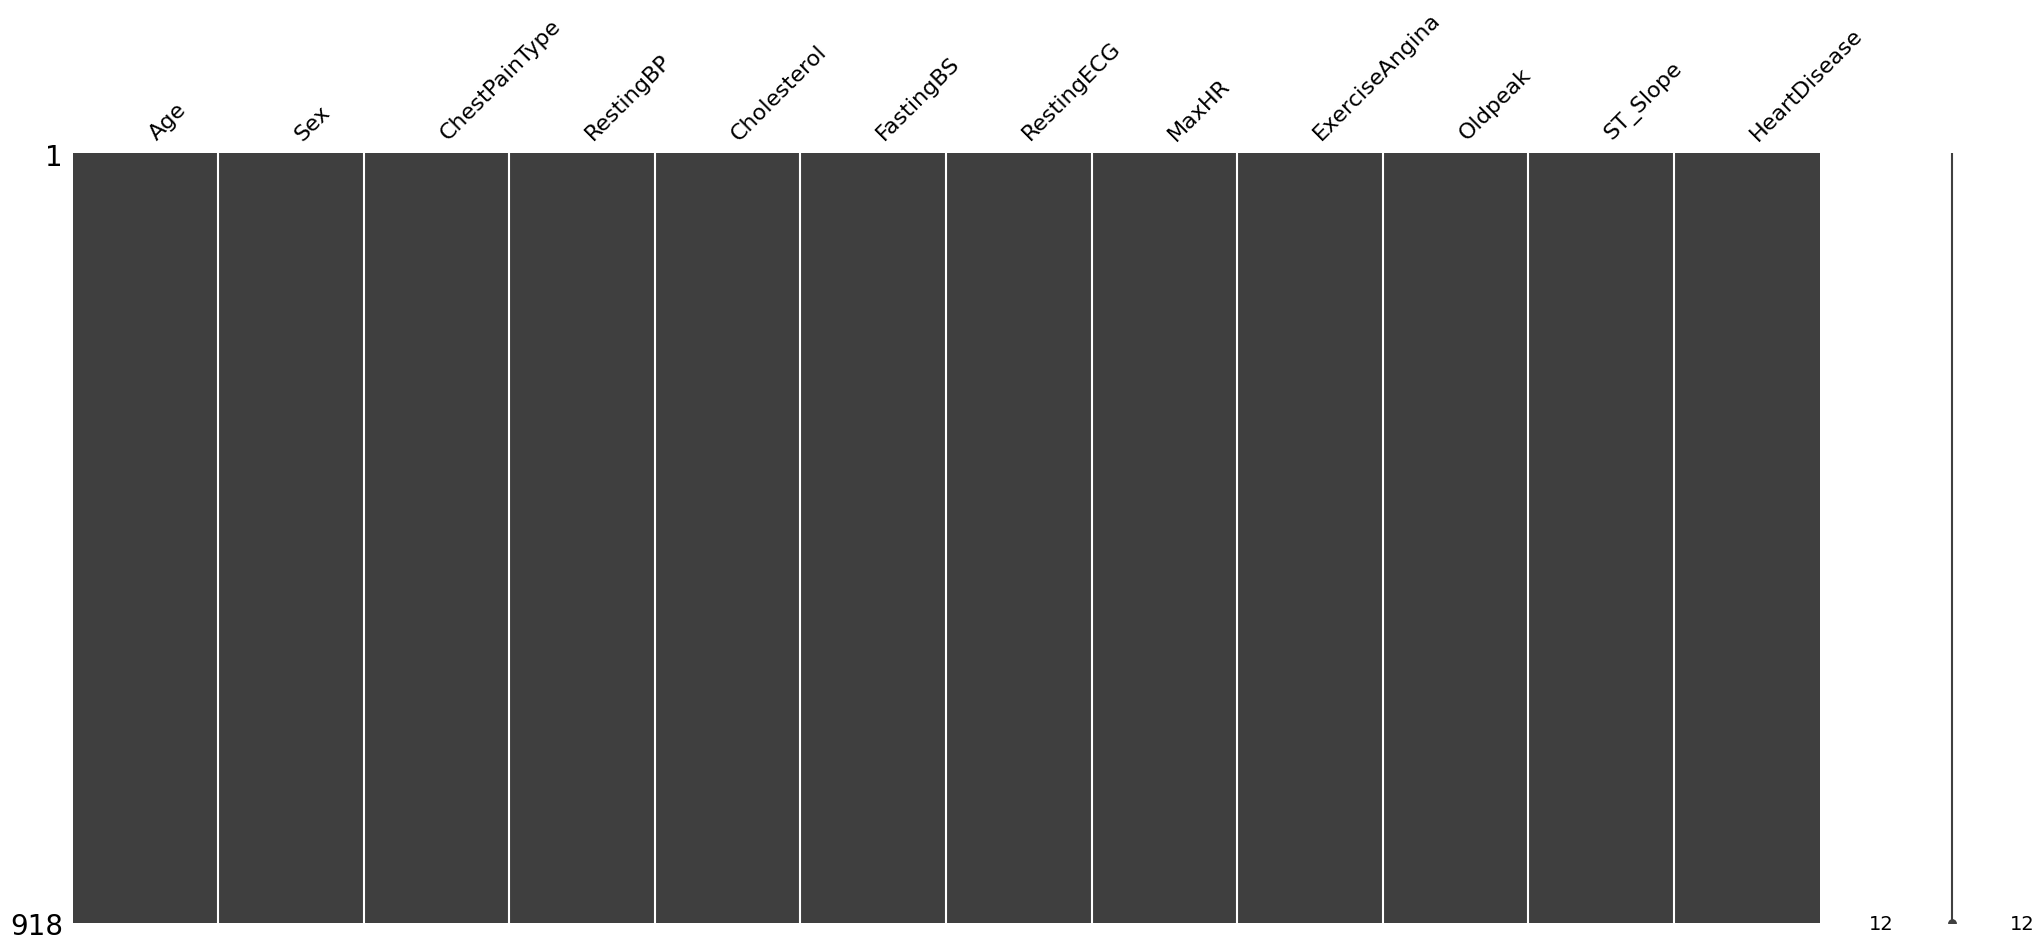

In [6]:
msno.matrix(my_data)

Observation, There are no missing values in the data set.

VISUALIZING THE DATASET IN GRAPHS: 

Graph to show the relationship between those with heart diseases and no heart diseases  by percentages. We will like to check the Number/Distribution between those with Heart Diseases as predicted in the dataset and those without Heart Diseases.



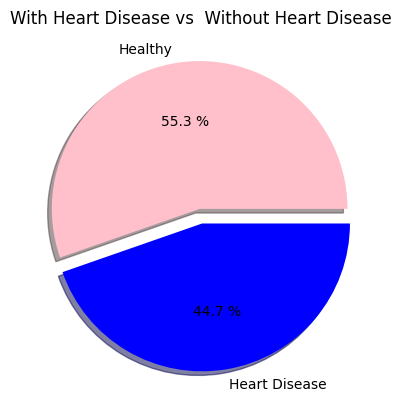

In [7]:
labels=["Healthy","Heart Disease"]

healthy_or_not = my_data['HeartDisease'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]
explode=[.05,.05]
Colours = ['pink', 'blue']

plt.title("With Heart Disease vs  Without Heart Disease")
plt.pie(values, labels= labels, colors= Colours, autopct='%.1f %%', explode=explode, shadow=True)
plt.show()


# The graph shows that there are less people with heart diseases in our dataset

Our Dataset as we can see above has more healthy (people without heart disease) than people with heart diseases

Let us now look at each Feature of the Dataset set individually to understand its correlation with our outcome

### Sex

According to Health analysis, the sex of the patient does not really play a vital role in the occurrence of heart diseases, but statistically men are more likely to have heart disease than women. 

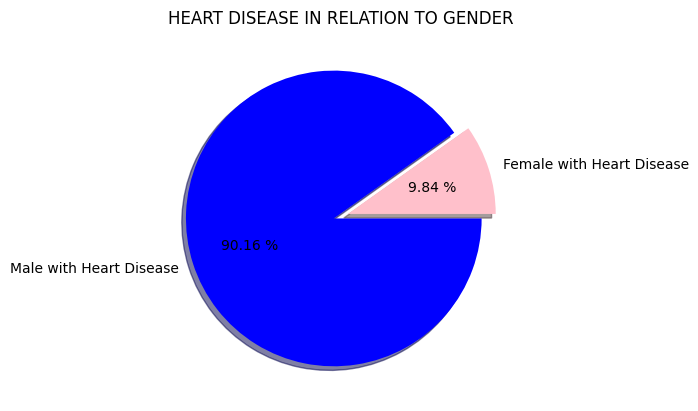

In [8]:
female_wHeartDisease = ((my_data.loc[my_data['Sex']== 'F'])['HeartDisease'] == 1).sum()
male_wHeartDisease = ((my_data.loc[my_data['Sex']== 'M'])['HeartDisease'] == 1).sum()

data = [female_wHeartDisease,male_wHeartDisease]
labels = ['Female with Heart Disease', 'Male with Heart Disease']
explode=[.05,.05]
Colours = ['pink', 'blue']

plt.title('HEART DISEASE IN RELATION TO GENDER')
plt.pie(data, labels= labels, colors= Colours, autopct='%.2f %%', explode=explode, shadow=True)
plt.show()

As we can see from the graph above, slightly above 90% of people with Heart Diseases are men.

### Age

According to my research, people that have reached the age of 65 years and above are more likely to have heart disease, which we can also check if it is represented well in our dataset

Text(0.5, 1.0, 'Distribution of Heart Diseases over Age')

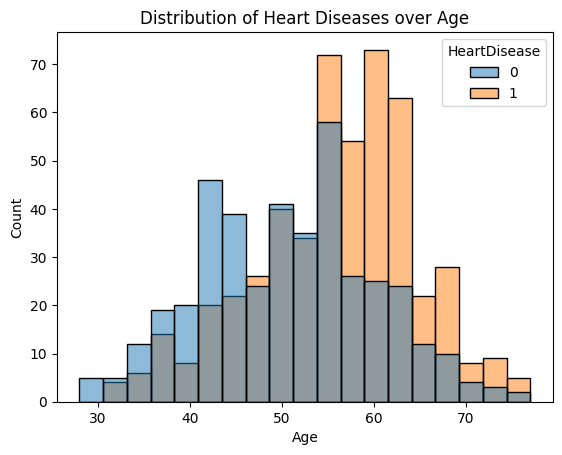

In [9]:
sns.histplot(data = my_data ,x = 'Age', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over Age")

From our above graph we can see that from about the age of 55, patients with Heart Diseases are more than those without and people from about the ages of 45 - 0 are less likely to have Heart Diseases.

### Chest Pain Type / Exercise induced Angina

Angina is a type of chest pain caused by reduced blood flow to the heart.
There are (4) four types of Angina used in the dataset:
1. ASY - Asymptomatic
2. TA - Typical Angina
3. ATA - Atypical Angina
4. NAP - Non-Anginal Pain

Exercised induced Angina: As the name implies is a angina that is caused by physical activity (exercise) in any form, Exercised induced angina labelled '1' indicates that the patient has angina in similarity to the 4 above types of angina. As such we will also show that relationship between exercised induced angina and the target Heart disease. Just to note, Chest pain(Angina) is not a factor that causes heart disease but it is a symptom experienced by many diagnosed patients of heart diseases.



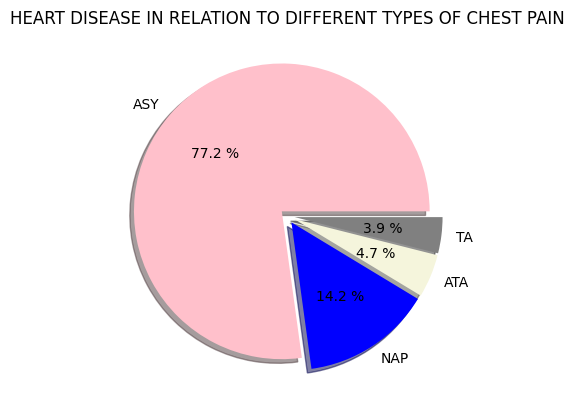

In [10]:
chestpaintype_ASY = ((my_data.loc[my_data['ChestPainType']== 'ASY'])['HeartDisease'] == 1).sum()
chestpaintype_NAP = ((my_data.loc[my_data['ChestPainType']== 'NAP'])['HeartDisease'] == 1).sum()
chestpaintype_ATA = ((my_data.loc[my_data['ChestPainType']== 'ATA'])['HeartDisease'] == 1).sum()
chestpaintype_TA = ((my_data.loc[my_data['ChestPainType']== 'TA'])['HeartDisease'] == 1).sum()


data = [chestpaintype_ASY, chestpaintype_NAP, chestpaintype_ATA, chestpaintype_TA]
labels = ['ASY', 'NAP', 'ATA', 'TA']
explode=[.05,.05, .05, .05]
Colours = ['pink', 'blue', 'beige', 'grey']


plt.title('HEART DISEASE IN RELATION TO DIFFERENT TYPES OF CHEST PAIN')
plt.pie(data, labels = labels, colors= Colours, autopct='%.1f %%', explode=explode, shadow=True)
plt.show()

In [11]:
px.histogram(data_frame = my_data, x = 'ChestPainType', color = 'HeartDisease', title="Distribution of Heart Diseases over ChestPainType",barmode="group")

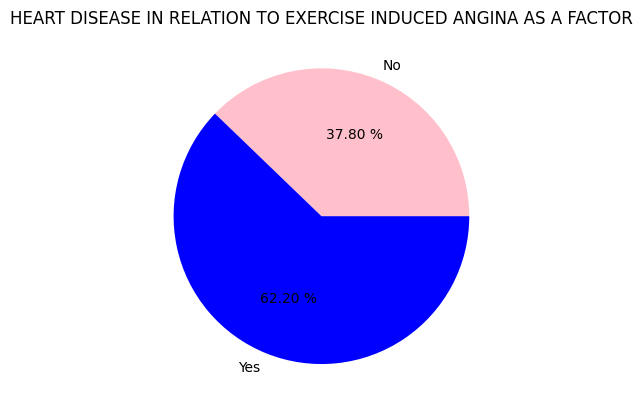

In [12]:
notexercising_wHeartDisease = ((my_data.loc[my_data['ExerciseAngina']== 'N'])['HeartDisease'] == 1).sum()
exercising_wHeartDisease = ((my_data.loc[my_data['ExerciseAngina']== 'Y'])['HeartDisease'] == 1).sum()

data = [notexercising_wHeartDisease,exercising_wHeartDisease]
labels = ['No', 'Yes']
Colours = ['pink', 'blue']

plt.title('HEART DISEASE IN RELATION TO EXERCISE INDUCED ANGINA AS A FACTOR')
plt.pie(data, labels= labels, colors= Colours, autopct='%.2f %%')
plt.show()

From the evaluation of our graph, we can conclude the following: 1) ASY is heavily related to the outcome of Heart diseases, as it performed greatly (2) The other types of heart disease (ATA, TA and NAP) did not show that they are clear signs of heart disease but there are indications however so we will be considering them (3) More than 50% of patient tested with Exercised induced angina have possibility of heart diseases so we be considering them as well 

### Resting ECG 

A Diagnostic Resting ECG (electrocardiogram) records the electrical activity of your heart while you are at rest. It provides information about your heart rate and rhythm, and can also show if there is enlargement of the heart, or evidence of a previous heart attack. We will show

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

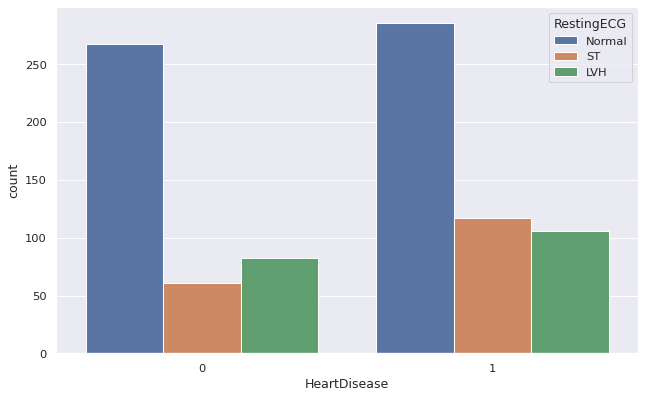

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(x='HeartDisease',data=my_data,hue='RestingECG')

This feature seems to be not impactful in predicting heart disease output as there are no significant different changes between two output categories. I have decided to remove this feature from my evaluation.

### MaxHR 

Maximum Heart Rate: Max HR
You can estimate your maximum heart rate based on your age. To estimate your maximum age-related heart rate, subtract your age from 220. For example, for a 65-year-old person, the estimated maximum age-related heart rate would be calculated as 220 – 65 years = 165 beats per minute (bpm).  For an healthy person however, the resting heart rate should be around 100(bpm), it is risky to have your resting heart rate constantly at the level of your maximum heart rate.
The graph will illustrate the relation between those with constant resting heart rates at their maximum and its relation with possible heart disease.


Text(0.5, 1.0, 'Distribution of Heart Diseases over MaxHR')

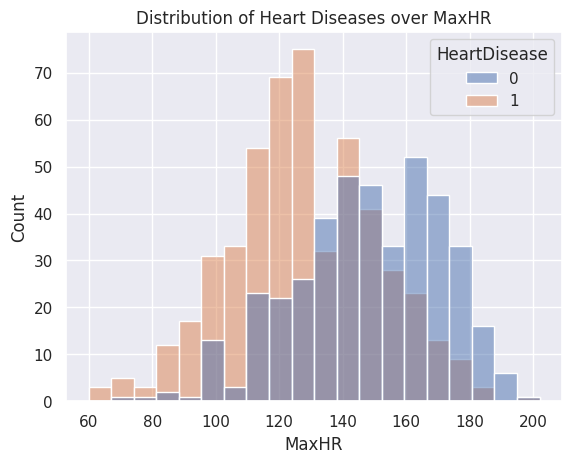

In [14]:
sns.histplot(data = my_data ,x = 'MaxHR', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over MaxHR")

People with cardiovascular diseases have a lower heart rate on average

###  Fasting BS / Cholesterol 

Fasting BS - Fasting Blood Sugar is represented in our dataset in 1 : for BS >120mg/dL (meaning high), 0 : for BS < 120mg/dL (meaning low). Fasting Blood Sugar is a sort of Diabetic Test, from my research I have discovered that majority of patients with high Cholesterol Levels are Diabetic and as such I have decided see the relation of these features and treat them like they as one. In order to make such conclusion i have to see how they correlate to each other in the dataset and also how they correlate with my target.

Text(0.5, 1.0, 'Distribution of Heart Disease over FastingBS')

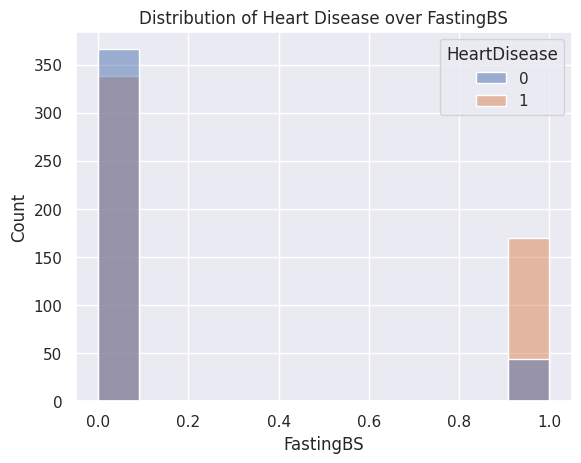

In [15]:
sns.histplot(data = my_data ,x = 'FastingBS', hue = 'HeartDisease')
plt.title("Distribution of Heart Disease over FastingBS")

Text(0.5, 1.0, 'Distribution of Heart Disease over Cholesterol')

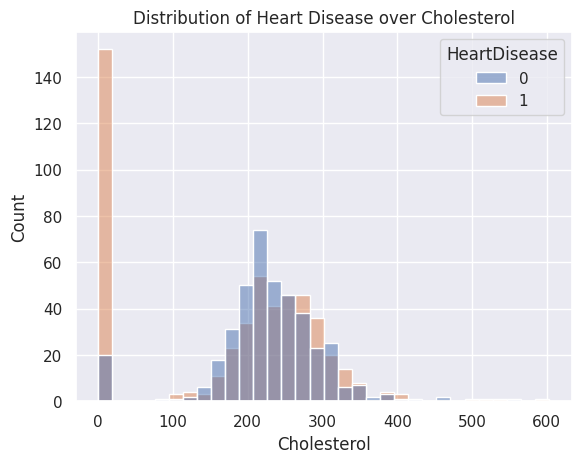

In [16]:
sns.histplot(data = my_data ,x = 'Cholesterol', hue = 'HeartDisease')
plt.title("Distribution of Heart Disease over Cholesterol")

<AxesSubplot: ylabel='Frequency'>

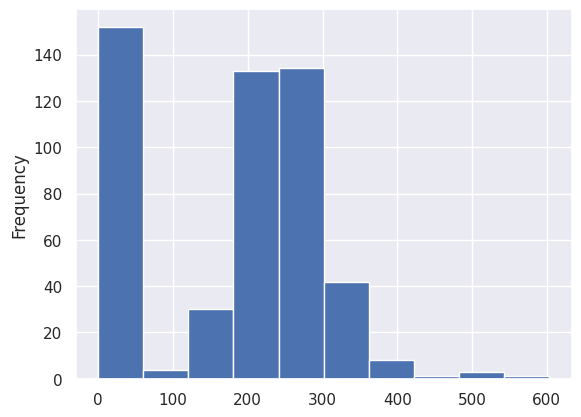

In [17]:
num3= my_data[my_data['HeartDisease']==1]['Cholesterol']
num3.plot(kind= 'hist')

### Old Peak /ST Slope

Old Peak - measured in values of ST depression, ST depression is a specific outcome that may appear in a person's ECG results. It occurs when the ST segment appears abnormally low and sits below the baseline in a person's results. We can relate this column to our RestingECG column but even better because these are numeric values. The Graph below shows the relation however to which numbers are signs of a possible or existing Heart Disease. 

ST_Slope: the Slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]



In [18]:
px.histogram(data_frame = my_data, x = 'Oldpeak', color = 'HeartDisease', title="Distribution of Heart Diseases over Old Peak",barmode="group")

### Resting BP

Resting Blood Pressure is the blood pressure level the heart pumps. A normal blood pressure level is less than 120/80 mmHg. No matter your age. Our dataset shows clearly that people with a Resting BP level of higher than 120 are more likely to be patients of Heart Diseases.

Text(0.5, 1.0, 'Distribution of Resting BP over Heart Disease')

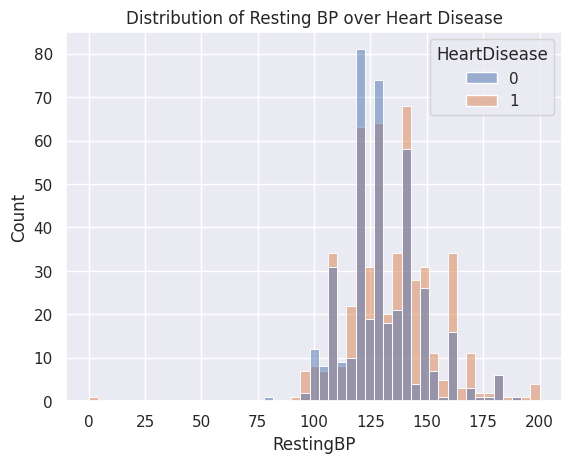

In [19]:
sns.histplot(data = my_data ,x = 'RestingBP', hue = 'HeartDisease')
plt.title("Distribution of Resting BP over Heart Disease")

LETS DRAW A CONCLUSION FROM THE EDA
Let's consider Numerical features and their relationship with the target feature:
1. Older people are most likely to get Cardiovascular Diseases;
2. Patients with CVD on average have higher blood pressure in a calm state than healthy ones;
3. The level of cholesterol in the blood of patients and healthy patients does not differ on average;
4. People with cardiovascular diseases have a lower heart rate on average;
5. Old Peak readings between 0.9 above have higher chances to predict Heart Diseases
     Old Peak readings of 0 are most like not patients of CVD.
From the consideration of categorical signs of patients, we will make an average picture of a CVD patient:
- Most likely a man;
- Complains of asymptomatic chest pain; 
- The presence of an anomaly of the ST-T wave on the ECG;
- There is angina caused by physical exertion;
- Flat peak ST segment;
- Fasting blood sugar level is more than 120 mg/dl.

# Data Pre-processing

We have No missing values in our dataset so we not be needing any imputers. We have two types of Data the Numerical and the Categorical dataset, I applied the Standardization approach, for feature scaling, to the columns with numerical values and to Handle my categorical data I applied the One Hot Encoding because they are Nominal features (without an order). Once this Transformations are done, we will apply the Column Transformer, this estimator allows different columns of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

In [20]:
my_transformation = ColumnTransformer(transformers=[
    ('1', StandardScaler(),['Age','RestingBP','Cholesterol','MaxHR', 'Oldpeak'] ),
    ('2', OneHotEncoder(drop='first',categories='auto'),['ChestPainType', 'ST_Slope','Sex', 'FastingBS','ExerciseAngina']),
    #('3', )
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

In [21]:
#temp=pd.DataFrame(my_transformation.fit_transform(my_data), columns=my_transformation.get_feature_names_out())

# Training and Test Set

In [22]:
X = my_data.drop(columns=['HeartDisease'])
y = my_data['HeartDisease']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42, shuffle=True)

# Model Selection

OK, we have succesfully preprocessed and transformed our data, the next step is to create a suitable model and select the best one through cross-validation, 
This process will take our hyperparameter optimization and the model we have created and combine them into a single block.                                                           We will train these models and evaluate them on the validation set to then choose which ones to carry through to the next stage(cross validation)
In our model we will not just be looking at the Classifier alone but we will be looking rather also into the other concepts and parameters from those concepts:
1. Classification : For our classification we will consider the following, Perceptron, Logistic Regression, KNeighbors , Random Forest Classifier,decision tree classifier.	
2. data transformation: my_transformation
3. Dimensionality reduction: For our Dimensionality Reduction Sequential Feature Selection, SFS, Linear Discriminant Analysis, LDA, and Principal Component Analysis, PCA. 
4. Sampling methods/techniques: To handle imbalanced classes we will employ the help of SMOTE,  Synthetic Minority Over-sampling Technique and the Random Over Sampler.
Lets begin:






THE MODEL PIPELINE

In [24]:
model_pipeline = IMBPipeline([
    ('trans', my_transformation), #our column transformation
    ('sampler', SMOTE()), # Sampling method
    ('dim_reduction', PCA(n_components=0.8)), # dimensionality reduction
    ('classifier', Perceptron()) #linear classifier
])

In [25]:
model_pipeline.fit(X_train, y_train) # to make sure that it working well

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('1', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('2',
                                                  OneHotEncoder(drop='first'),
                                                  ['ChestPainType', 'ST_Slope',
                                                   'Sex', 'FastingBS',
                                                   'ExerciseAngina'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [26]:
model_pipeline.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1])

(model configuration)

model configuration: In our pipeline above since we are dealing with different classification methods, dimensionality reduction, and sampling techniques of which each, and all have different hyperparameters we will like to consider, we will create lists for each of these concepts and in this list dictionaries with the desired hyperparameters and we will take this dictionaries and merge them into a single dictionary (chosen_configuration). 

In [27]:
sampler_configs = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100),
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10, 15] ,
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500], 
        'classifier__max_depth': [4,6,8,10,12]
    },
    {
        'classifier' :[DecisionTreeClassifier()],
        'classifier__max_depth': [1,2,3,4],
        'classifier__random_state':[0]
    }
]

In [28]:
chosen_configs = [dict(itertools.chain(*(e.items() for e in configuration))) for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs)]

Now we look for the best candidates of our model with nested cross-validation, the goal is to see and improve the performance of the model by finding the most sufficient set of hyperparameters. We will use cross validation to divide our data into k-folds and will train our dataset with the best hyperparameters we get from running the Randomized Search Grid. In the Randomized search Grid we will use the hyperparameters we can defined in our configuration list, divide with a cross-validation (split of our choice) and get the scoring metrics (we choose the f1).

In [29]:
randomsearch = RandomizedSearchCV(estimator=model_pipeline,
    param_distributions=chosen_configs,
    n_iter=len(chosen_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1'
)

In [30]:
scores = cross_validate(randomsearch, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=3) #2 minutes #for the dataset

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ......................................., score=0.877 total time= 1.6min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
[CV] END ......................................., score=0.867 total time= 1.3min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s
[CV] END ......................................., score=0.866 total time= 1.4min
[CV] END ......................................., score=0.857 total time= 1.2min
[CV] END ......................................., score=0.797 total time= 1.1min
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.6min finished


In [31]:
#for each iteration of our cross-validation we want to get the best estimator of each configuration (by the randomized search grid),
#the hyperparameter of the estimator and the score of the estimators performance
#The will help see the output of the cross-validation and decide what the best hyperparameters are.

for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

None
SequentialFeatureSelector(cv=None, estimator=Perceptron(), k_features=(10, 10),
                          scoring='f1')
KNeighborsClassifier(n_neighbors=7) {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.8765432098765432
----------
None
LinearDiscriminantAnalysis()
LogisticRegression(C=0.013923898021187871, penalty='l1', solver='saga') {'C': 0.013923898021187871, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.8834355828220859
----------
None
LinearDiscriminantAnalysis()
DecisionTreeClassifier(max_depth=1, random_state=0) {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decreas

In [32]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.9004739336492891, F1 on test set:0.8857142857142858
F1 on training set:0.883495145631068, F1 on test set:0.900473933649289
F1 on training set:0.8861985472154963, F1 on test set:0.900473933649289
F1 on training set:0.9571603427172583, F1 on test set:0.8878048780487806
F1 on training set:0.8825622775800712, F1 on test set:0.8878504672897195
F1 on training set:0.9004739336492891, F1 on test set:0.8857142857142858
F1 on training set:0.926060606060606, F1 on test set:0.8803827751196173
F1 on training set:0.883495145631068, F1 on test set:0.900473933649289
F1 on training set:0.9227053140096618, F1 on test set:0.8557692307692308
F1 on training set:0.8324468085106382, F1 on test set:0.8111111111111112


## Model cleaning.

Now that we have seen the F1 score on the validation fold on the best estimator we can make a selection on the best candidate and diagnose problems of bias and variance. We have our best candidate now so we will work closely with that estimator and its parameters, build a new model pipeline.

In [33]:
best_model_pipeline = IMBPipeline([
    ('trans', my_transformation),
    ('classifier',KNeighborsClassifier(n_neighbors=50))
    #('classifier', RandomForestClassifier(n_estimators=50))
    #('classifier', DecisionTreeClassifier(max_depth=1))
    
])

In [34]:
params = {
    'classifier__n_neighbors': [3,5,7,9]
    #'classifier__n_estimators' : [10,50,100, 500] # trying Random Forest
    #'classifier__max_depth': [1,2,3,4] # trying the decision tree
}

In [35]:
randoms_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
) # Another Random Search Grid but using just the refined hyperparameters and models

In [36]:
print(f'Best score got by the best estimator: {randoms_best.best_score_}')
print(f'Configuration for the best estimator/classifier: {randoms_best.best_params_}')

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [62]:
randoms_best.fit(X_train, y_train) # make fiiting with the Train 

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('1',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'RestingBP',
                                                                                'Cholesterol',
                                                                                'MaxHR',
                                                                                'Oldpeak']),
                                                                              ('2',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ChestPainType',
                                                                                'ST_Slope',
                                                                                'Sex',
                                                                                'FastingBS',
                                                                                'ExerciseAngina'])],
                                                                verbose_feature_names_out=False)),
                                             ('classifier',
                                              KNeighborsClassifier(n_neighbors=50))]),
                   n_iter=20,
                   param_distributions={'classifier__n_neighbors': [3, 5, 7,
                                                                    9]},
                   scoring='f1')

In [63]:
randoms_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('1', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('2',
                                                  OneHotEncoder(drop='first'),
                                                  ['ChestPainType', 'ST_Slope',
                                                   'Sex', 'FastingBS',
                                                   'ExerciseAngina'])],
                                   verbose_feature_names_out=False)),
                ('classifier', KNeighborsClassifier(n_neighbors=9))])

In [64]:
f1_score(y_test, randoms_best.best_estimator_.predict(X_test)) # what is my F1 score?

0.9047619047619048

# Learning and Validation curve

We are going to use the Learning and Validation curve to check for bias and variances to see if you made the right selection for the estimator and hyperparameters. we will achieve this by taking the training sizes and the hyperparameter needed. Because we have chosen to use the KNeighbors, we will set n_neighbors as our hyperparameter.

By plotting the model training and validation accuracies as functions of the training set size, we can easily detect whether the model suffers from high variance(overfitting) or high bias(underfitting), and whether the collection of more data could help address this problem.



In [65]:
cls = randoms_best.best_estimator_

In [66]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

(0.6, 1.03)

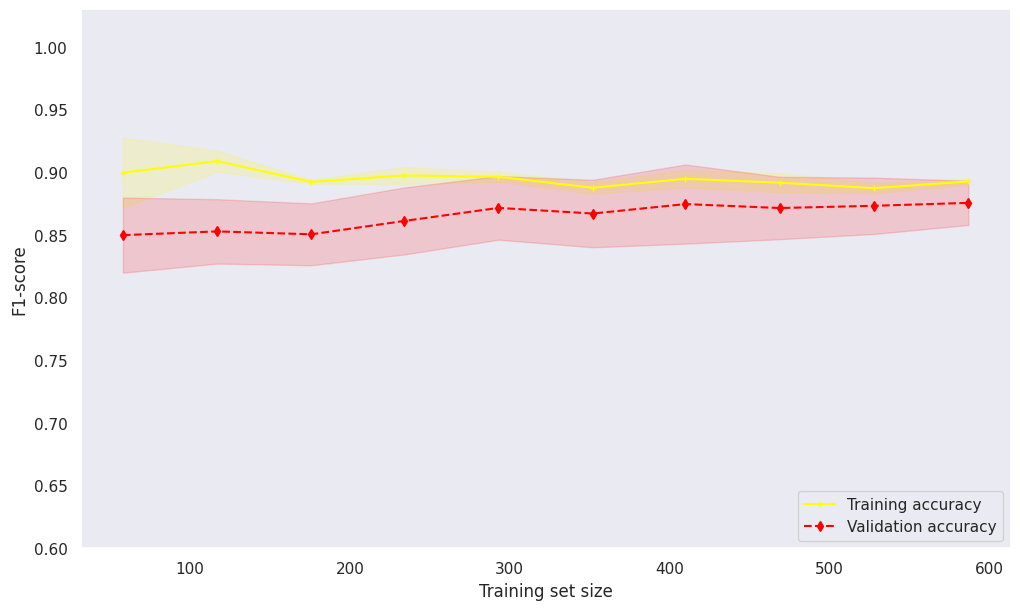

In [68]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_mean,
         color='yellow', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='yellow')

ax.plot(train_sizes, test_mean,
         color='red', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='red')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

In [71]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__n_neighbors', #'classifier__n_estimators' #'classifier__max_depth'
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

(0.5, 60.0)

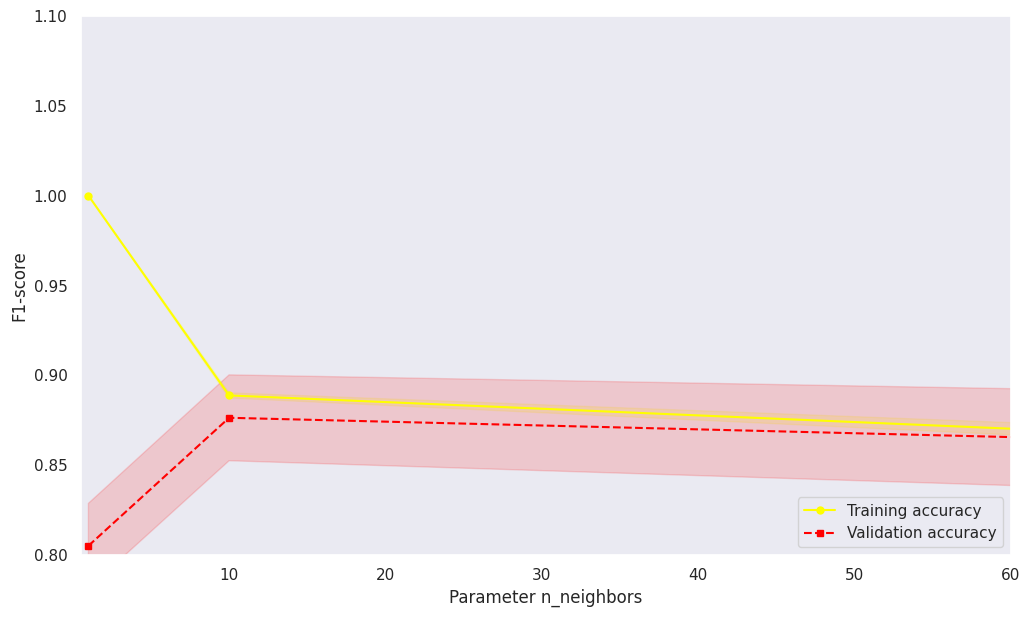

In [72]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='yellow', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='yellow')

ax.plot(range_C, test_mean,
         color='red', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='red')

ax.grid()
ax.set_xlabel('Parameter n_neighbors')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.8, 1.1])
ax.set_xlim([0.5,60])

# Model Evaluation

Before we get into the details of different performances metrics, let's take a look at a confusion matrix, also known as the error matrix, a matrix that lays out the performance of a learning algorithm. The confusion matrix is simply a square matrix that reports the counts of the True positive (TP), True negative (TN), False positive (FP), and False negative (FN).

### Confusion Matrix

In [73]:
y_pred = randoms_best.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[69 13]
 [ 7 95]]


### Performance Metrics?

Precision: The number of true positives divided by the number of true positives plus the number of false false positives.
Recall: The number of true positives divided by the number of true positives plus the number of false negatives.
Accuracy score: is calculated by dividing the number of correct predictions by the total prediction number.

To relate this directly to the case of heart prediction, we will be more interested with the recall score, why?, because the higher the recall score the lower we have false negatives. False Negatives in our case means that a patients who has Cardiovascular disease was not detected and this is very bad. At this evaluation I stated that late detection of CVD is a major reason why so many people die yearly from this disease. Having a False Positive here will not be good, but it will be be far better for a healthy person to be diagnosed for a terminal disease which he does not have, than a  sick person be told he or she is healthy.

In [75]:
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)


In [76]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

table_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy'])
table_score.insert(0, 'KNeighbors', 'After tuning hyperparameters')
table_score

,KNeighbors,Recall,Precision,F1 Score,Accuracy
0,After tuning hyperparameters,0.931373,0.87963,0.904762,0.891304


### Roc-Curve

ROC is a probability curve and AUC represents the degree or measure of separability.
ROC (Receiver Operating Curve) is a common tool for binary classification. It plots the Recall against the false positive rate FPR.

AUC (Area Under The Curve) curve.
AUC measures. It measures the area under the ROC curve
When AUC is 0.8, it means there is a 80% chance that the model will be able to distinguish between positive class and negative class.
The AUC also helps to tell us how good our classifier is, The closer the number is to 1 the better and a number close to 0.5 is like taking a guess.
We hope to have a score above 0.9 !



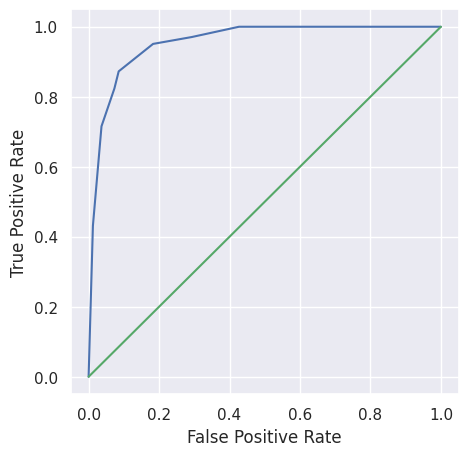

In [78]:
y_probability = randoms_best.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_probability[:, 1])

In [79]:
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for KNeighbors with tuned hyperparameters: {ROCAUCscore:.4f}")

AUC-ROC Curve for KNeighbors with tuned hyperparameters: 0.8864


Our score was not above 0.9, :(  but being almost 89% correct should be able to make a difference in saving lives from a deadly disease.

### Precision/Recall Curve

Lets also take a look at the Precision Recall Curve, the precision-recall curve shows the tradeoff between precision and recalls for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. This would be perfect in predicting heart failure.

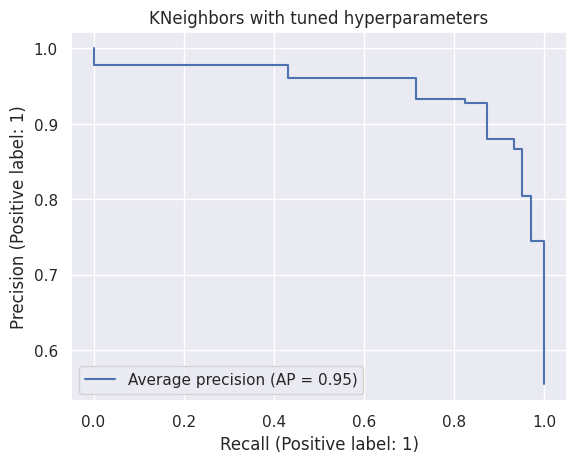

In [80]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    randoms_best, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("KNeighbors with tuned hyperparameters")

:) We obtained a very high score on our graph. 

## conclusion

If we look at it from a business or analytical point of view, I believe this model can perform better because when it comes to issues on health even a 93% recall score will still lead to possible loss of life, but overall it is a good model. Thank you 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18d58926-9695-4992-9f8b-5b995d23de62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>